In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
data = pd.read_csv("kochi_weather_2018_2024.csv")
data.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-15,27.2,23.0,34.0,NaN,NaN,NaN,8.8,NaN,1010.1,NaN
1,2020-01-16,27.3,23.0,33.0,NaN,NaN,NaN,7.4,NaN,1010.5,NaN
2,2020-01-17,27.7,NaN,NaN,NaN,NaN,NaN,8.2,NaN,1010.5,NaN
3,2020-01-18,28.2,23.0,33.0,NaN,NaN,NaN,5.0,NaN,1009.8,NaN
4,2020-01-19,29.6,24.0,34.0,NaN,NaN,NaN,8.2,NaN,1010.2,NaN


In [3]:
data.isnull().sum()

,0
time,0
tavg,26
tmin,95
tmax,95
prcp,365
snow,1813
wdir,1813
wspd,27
wpgt,1813
pres,26


In [4]:
data.shape

(1813, 11)

In [5]:
data.drop("tsun", axis=1, inplace=True)
data.drop("wpgt", axis=1, inplace=True)
data.drop("wdir", axis=1, inplace=True)
data.drop("snow", axis=1, inplace=True)
data

,time,tavg,tmin,tmax,prcp,wspd,pres
0,2020-01-15,27.2,23.0,34.0,NaN,8.8,1010.1
1,2020-01-16,27.3,23.0,33.0,NaN,7.4,1010.5
2,2020-01-17,27.7,NaN,NaN,NaN,8.2,1010.5
3,2020-01-18,28.2,23.0,33.0,NaN,5.0,1009.8
4,2020-01-19,29.6,24.0,34.0,NaN,8.2,1010.2
...,...,...,...,...,...,...,...
1808,2024-12-27,27.0,24.0,30.0,1.7,9.3,1013.0
1809,2024-12-28,27.5,24.2,30.8,0.0,8.6,1012.6
1810,2024-12-29,27.6,23.9,31.5,0.0,9.5,1012.2
1811,2024-12-30,28.1,23.8,33.4,1.0,9.0,1011.6


In [6]:
data['time']= pd.to_datetime(data['time'])
data

,time,tavg,tmin,tmax,prcp,wspd,pres
0,2020-01-15,27.2,23.0,34.0,NaN,8.8,1010.1
1,2020-01-16,27.3,23.0,33.0,NaN,7.4,1010.5
2,2020-01-17,27.7,NaN,NaN,NaN,8.2,1010.5
3,2020-01-18,28.2,23.0,33.0,NaN,5.0,1009.8
4,2020-01-19,29.6,24.0,34.0,NaN,8.2,1010.2
...,...,...,...,...,...,...,...
1808,2024-12-27,27.0,24.0,30.0,1.7,9.3,1013.0
1809,2024-12-28,27.5,24.2,30.8,0.0,8.6,1012.6
1810,2024-12-29,27.6,23.9,31.5,0.0,9.5,1012.2
1811,2024-12-30,28.1,23.8,33.4,1.0,9.0,1011.6


In [7]:
data['prcp']= data['prcp'].fillna(0)
data

,time,tavg,tmin,tmax,prcp,wspd,pres
0,2020-01-15,27.2,23.0,34.0,0.0,8.8,1010.1
1,2020-01-16,27.3,23.0,33.0,0.0,7.4,1010.5
2,2020-01-17,27.7,NaN,NaN,0.0,8.2,1010.5
3,2020-01-18,28.2,23.0,33.0,0.0,5.0,1009.8
4,2020-01-19,29.6,24.0,34.0,0.0,8.2,1010.2
...,...,...,...,...,...,...,...
1808,2024-12-27,27.0,24.0,30.0,1.7,9.3,1013.0
1809,2024-12-28,27.5,24.2,30.8,0.0,8.6,1012.6
1810,2024-12-29,27.6,23.9,31.5,0.0,9.5,1012.2
1811,2024-12-30,28.1,23.8,33.4,1.0,9.0,1011.6


In [8]:
data[['tavg','tmin','tmax','wspd','pres']]= data[['tavg','tmin','tmax','wspd','pres']].interpolate(method='linear')
data

,time,tavg,tmin,tmax,prcp,wspd,pres
0,2020-01-15,27.2,23.0,34.0,0.0,8.8,1010.1
1,2020-01-16,27.3,23.0,33.0,0.0,7.4,1010.5
2,2020-01-17,27.7,23.0,33.0,0.0,8.2,1010.5
3,2020-01-18,28.2,23.0,33.0,0.0,5.0,1009.8
4,2020-01-19,29.6,24.0,34.0,0.0,8.2,1010.2
...,...,...,...,...,...,...,...
1808,2024-12-27,27.0,24.0,30.0,1.7,9.3,1013.0
1809,2024-12-28,27.5,24.2,30.8,0.0,8.6,1012.6
1810,2024-12-29,27.6,23.9,31.5,0.0,9.5,1012.2
1811,2024-12-30,28.1,23.8,33.4,1.0,9.0,1011.6


In [9]:
data.isnull().sum()

,0
time,0
tavg,0
tmin,0
tmax,0
prcp,0
wspd,0
pres,0


In [10]:
time = data['time']
num_data= data.drop('time', axis=1)
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(num_data)
scaled_df = pd.DataFrame(scaled_data, columns=num_data.columns)
scaled_df['time'] = time
scaled_df.head()

,tavg,tmin,tmax,prcp,wspd,pres,time
0,0.450704,0.421053,0.692308,0.0,0.289720,0.574803,2020-01-15
1,0.464789,0.421053,0.615385,0.0,0.224299,0.606299,2020-01-16
2,0.521127,0.421053,0.615385,0.0,0.261682,0.606299,2020-01-17
3,0.591549,0.421053,0.615385,0.0,0.112150,0.551181,2020-01-18
4,0.788732,0.526316,0.692308,0.0,0.261682,0.582677,2020-01-19


In [11]:
X = scaled_df.drop(columns=['tavg', 'time'])
y = scaled_df['tavg']

In [12]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(363, 5)

In [14]:
model = Sequential()
model.add(Dense(100, input_dim=5, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

#callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,196 (28.11 KB)

 Trainable params: 7,196 (28.11 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_info = model.fit(X_train, y_train, epochs=100,
                          validation_data=(X_test,y_test)
                          #callbacks=callbacks
                          )

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.0000e+00 - loss: 0.0868 - val_accuracy: 0.0014 - val_loss: 0.0361
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0000e+00 - loss: 0.0267 - val_accuracy: 0.0014 - val_loss: 0.0190
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0156 - val_accuracy: 0.0014 - val_loss: 0.0132
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0109 - val_accuracy: 0.0014 - val_loss: 0.0083
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0063 - val_accuracy: 0.0014 - val_loss: 0.0066
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0051 - val_accuracy: 0.0014 - val_loss: 0.0060
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0045 - val_accuracy: 0.0014 - val_loss: 0.0057
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 -

In [16]:
hist = training_info.history

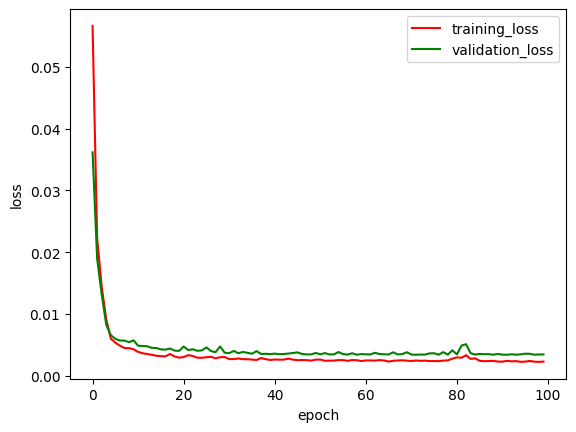

In [17]:
plt.plot(hist['loss'], label= 'training_loss', color='red')
plt.plot(hist['val_loss'], label= 'validation_loss', color= 'green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [19]:
y_pred = model.predict(X_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred[:,0])

0.8905820223113251

In [21]:
pd.DataFrame({'True values':y_test, 'Predicted values':y_pred[:,0]})

,True values,Predicted values
806,0.577465,0.511344
1304,0.422535,0.432717
864,0.323944,0.382088
1747,0.309859,0.280326
907,0.197183,0.237393
...,...,...
1130,0.352113,0.351200
1294,0.408451,0.395046
860,0.323944,0.314079
1459,0.366197,0.449908


In [23]:
import joblib
joblib.dump(model, 'weathermodel.pkl')

['weathermodel.pkl']